In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import plotly.express as px

In [212]:
year_1 = "2008"
year_2 = "2018"

In [213]:
df_1 = pd.read_csv(f"../data/SmokingAndTobaccoData{year_1}-enhanced.csv")
df_2 = pd.read_csv(f"../data/SmokingAndTobaccoData{year_2}-enhanced.csv")

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



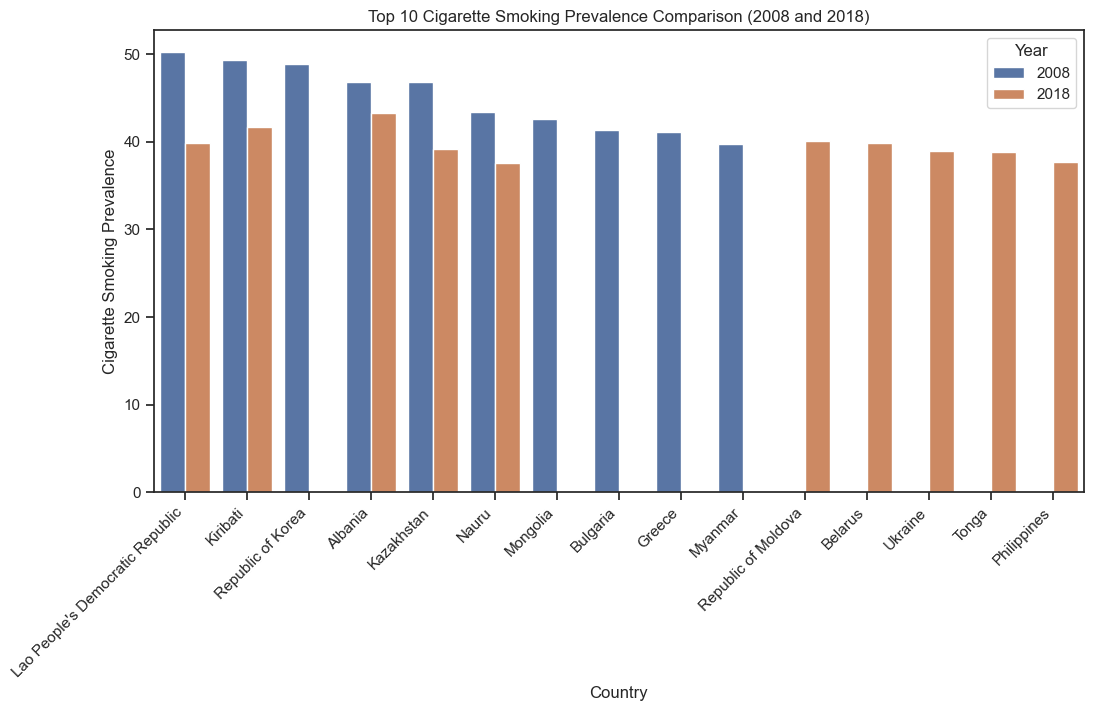

In [214]:
df_1_sorted = df_1.sort_values(by='CigaretteSmokingPrevalence', ascending=False).head(10)
df_2_sorted = df_2.sort_values(by='CigaretteSmokingPrevalence', ascending=False).head(10)

df_1_sorted['Year'] = year_1
df_2_sorted['Year'] = year_2

combined_df = pd.concat([df_1_sorted, df_2_sorted])

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='CigaretteSmokingPrevalence', hue='Year', data=combined_df)
plt.title('Top 10 Cigarette Smoking Prevalence Comparison (2008 and 2018)')
plt.xlabel('Country')
plt.ylabel('Cigarette Smoking Prevalence')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', loc='upper right')
plt.show()

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:



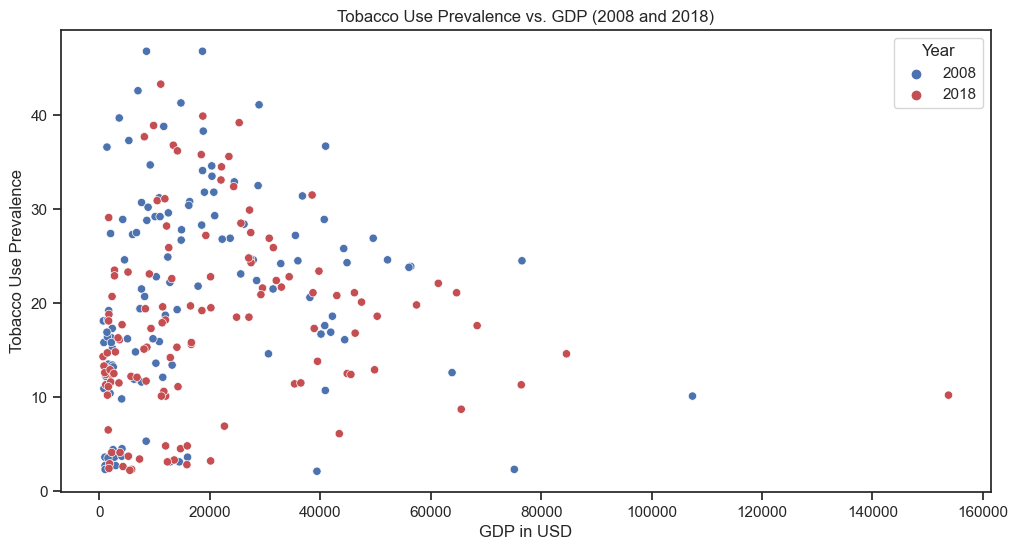

In [215]:
df_1['Year'] = year_1
df_2['Year'] = year_2

combined_df = pd.concat([df_1, df_2])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='GDPinUSD', y='CigaretteSmokingPrevalence', hue='Year', data=combined_df, palette={'2008': 'b', '2018': 'r'})
plt.title('Tobacco Use Prevalence vs. GDP (2008 and 2018)')
plt.xlabel('GDP in USD')
plt.ylabel('Tobacco Use Prevalence')
plt.legend(title='Year', loc='upper right')
plt.show()

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



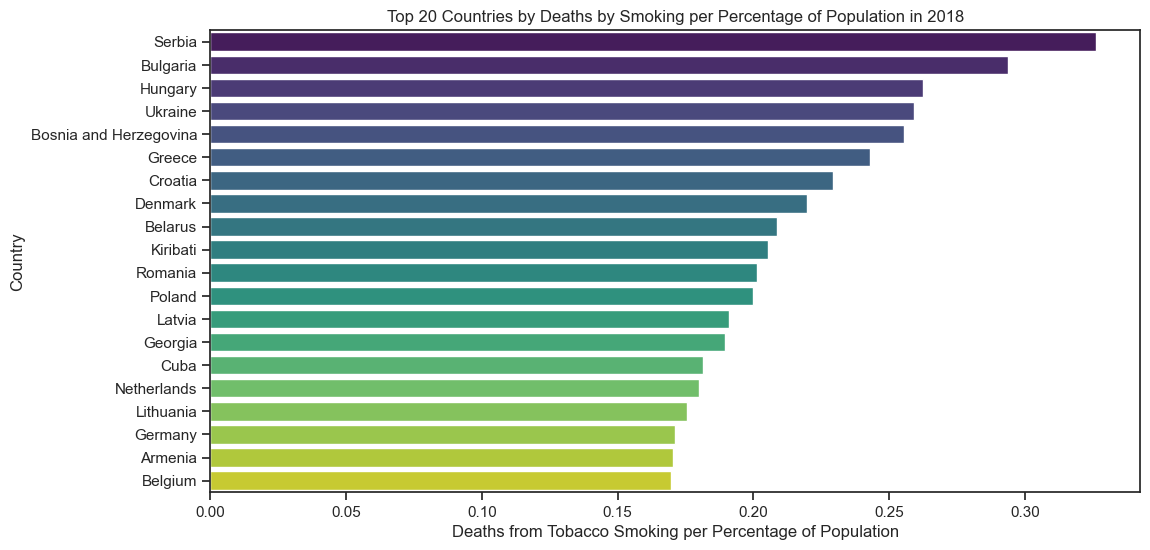

In [216]:
df_2['DeathsBySmokingPerPopulation'] = (df_2['DeathsBySmoking'] / df_2['Population']) * 100
df_2_sorted = df_2.sort_values(by='DeathsBySmokingPerPopulation', ascending=False)

top_20_countries = df_2_sorted.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='DeathsBySmokingPerPopulation', y='Country', data=top_20_countries, palette='viridis')
plt.title('Top 20 Countries by Deaths by Smoking per Percentage of Population in ' + year_2)
plt.xlabel('Deaths from Tobacco Smoking per Percentage of Population')
plt.ylabel('Country')
plt.show()

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:



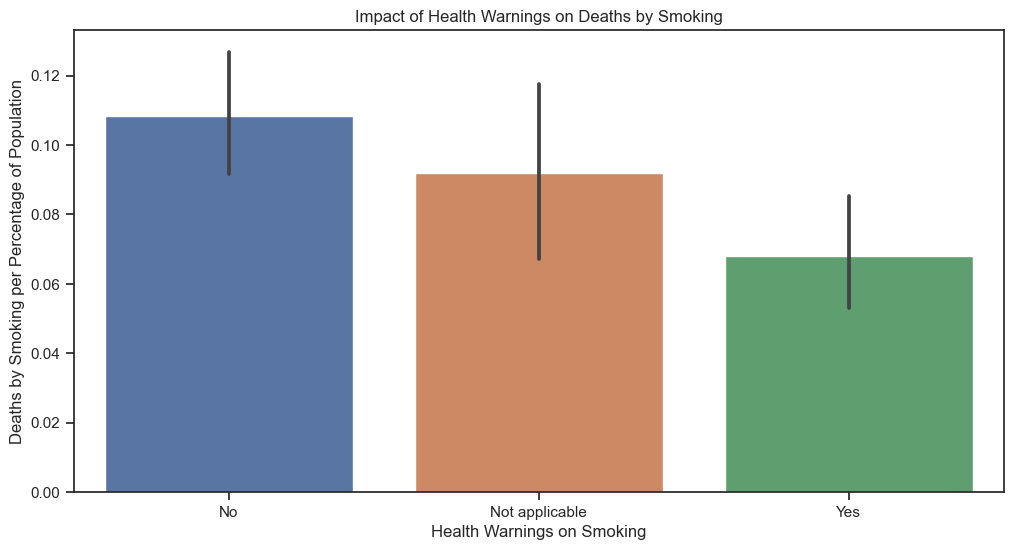

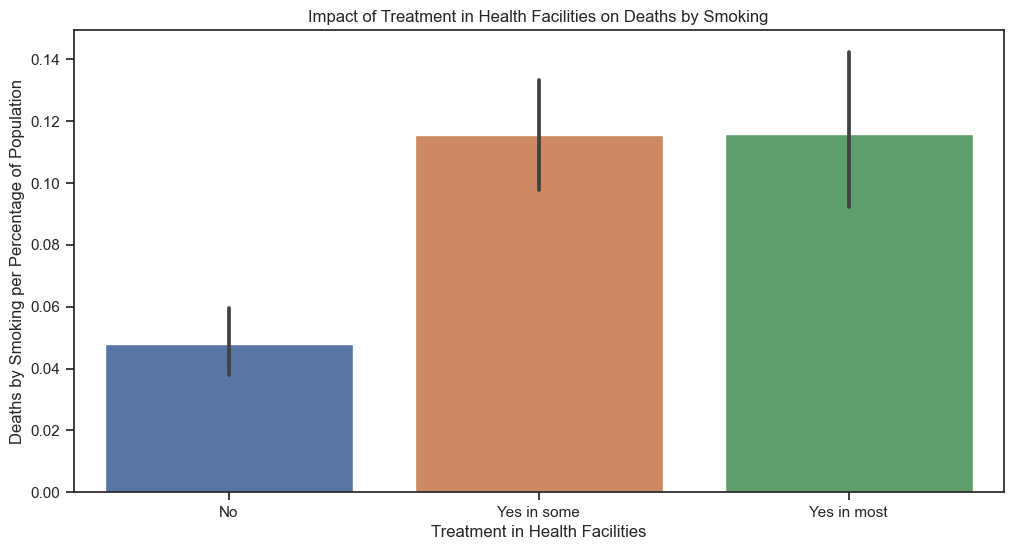

In [217]:
df_2["HealthWarningsOnSmoking"] = df_2["HealthWarningsOnSmoking"].map({"No": 0, "Not applicable": 1, "Yes": 2})
df_2["TreatmentInHealthFacilities"] = df_2["TreatmentInHealthFacilities"].map({"No": 0, "Yes in some": 1, "Yes in most": 2})

df_2["DeathsBySmokingPerPopulation"] = (df_2["DeathsBySmoking"] / df_2["Population"]) * 100

df_2 = df_2.dropna(subset=["HealthWarningsOnSmoking", "TreatmentInHealthFacilities", "DeathsBySmokingPerPopulation"])

plt.figure(figsize=(12, 6))
ax = sns.barplot(x="HealthWarningsOnSmoking", y="DeathsBySmokingPerPopulation", data=df_2)
plt.title("Impact of Health Warnings on Deaths by Smoking")
plt.xlabel("Health Warnings on Smoking")
plt.ylabel("Deaths by Smoking per Percentage of Population")

ax.set_xticklabels(["No", "Not applicable", "Yes"])

plt.figure(figsize=(12, 6))
ax = sns.barplot(x="TreatmentInHealthFacilities", y="DeathsBySmokingPerPopulation", data=df_2)
plt.title("Impact of Treatment in Health Facilities on Deaths by Smoking")
plt.xlabel("Treatment in Health Facilities")
plt.ylabel("Deaths by Smoking per Percentage of Population")

ax.set_xticklabels(["No", "Yes in some", "Yes in most"])

plt.show()

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



Pearson's Correlation Coefficient: 0.11857263162094012


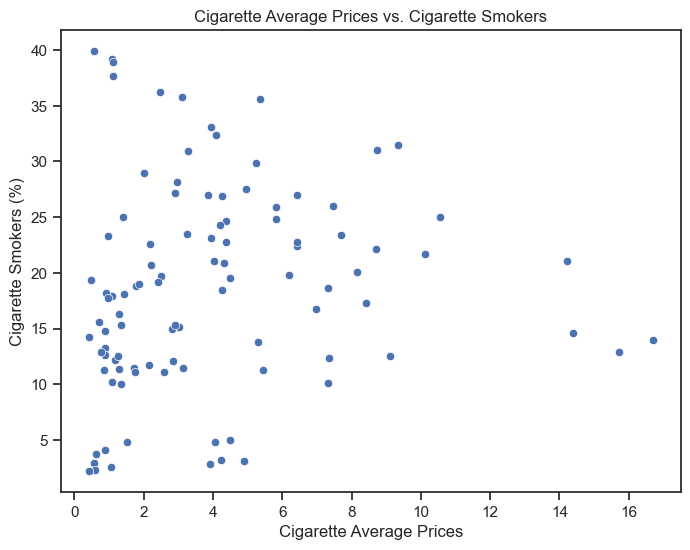

In [218]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="MostSoldBrandCigarettePriceInUSD", y="CigaretteSmokingPrevalence")
plt.title("Cigarette Average Prices vs. Cigarette Smokers")
plt.xlabel("Cigarette Average Prices")
plt.ylabel("Cigarette Smokers (%)")

correlation = df['MostSoldBrandCigarettePriceInUSD'].corr(df['CigaretteSmokingPrevalence'])
print(f"Pearson's Correlation Coefficient: {correlation}")

plt.show()

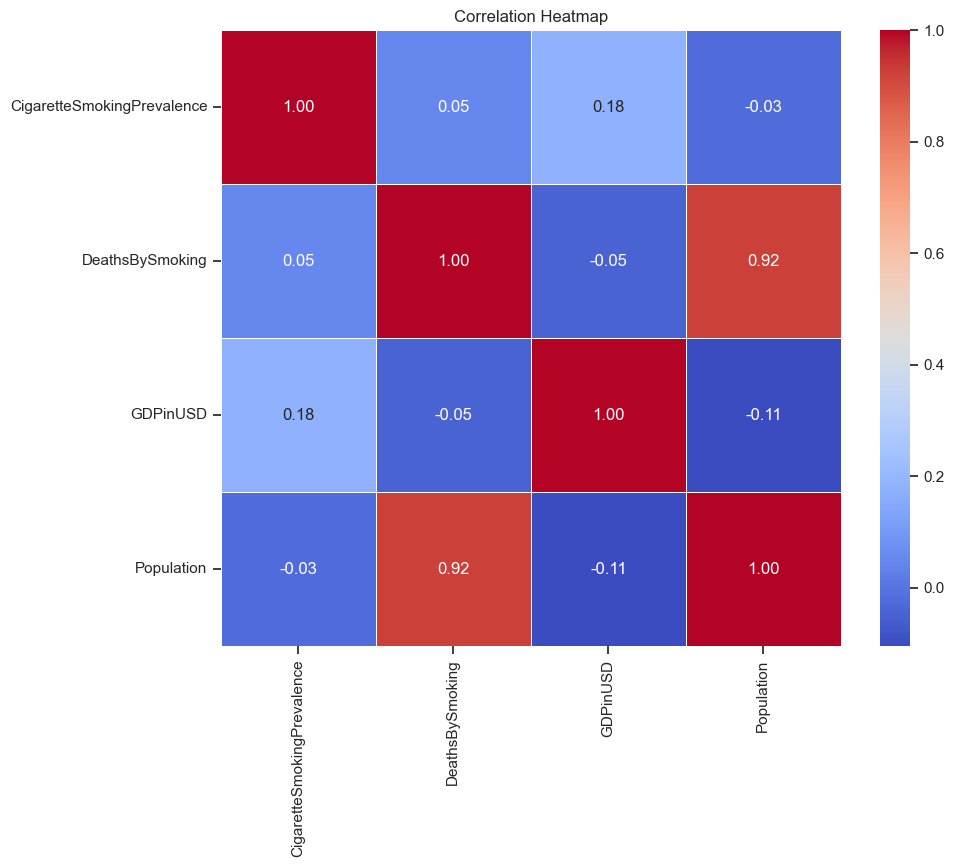

In [219]:
numeric_columns = ["CigaretteSmokingPrevalence", "DeathsBySmoking", "GDPinUSD", "Population"]

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [220]:
fig = px.choropleth(
  df, 
  locations='Country', 
  locationmode='country names',
  color='CigaretteSmokingPrevalence',
  color_continuous_scale='Viridis',
  title=f"Cigarette Smoking Prevalence (%) in {year_2}"
)

fig.update_geos(projection_type="natural earth")
fig.show()